In [320]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [321]:
!rm -rf ./out
!mkdir ./out

In [322]:
cur_dir = %pwd

In [323]:
in_files = glob.glob(os.path.join(cur_dir, 'in', '*.txt'))
test_cases = [os.path.basename(f) for f in in_files]   

In [324]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [325]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, 'out', os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode('utf-8').strip().split('\n')[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [326]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [327]:
df = df.sort_index()

In [328]:
df.to_csv("test_res.csv")

In [329]:
df = df.iloc[:, -5:]
df = df.applymap(lambda x: np.log10(x) if x > 0 else 0)

In [330]:
df.describe()

,2023-12-23T13:50:00.901757,2023-12-23T17:58:30.100644,2023-12-25T16:44:56.135549,2023-12-25T17:03:55.887693,2023-12-25T18:21:57.182957
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.293991,5.313739,5.392127,5.448760,5.441431
std,1.198598,1.184529,1.230059,1.234352,1.230744
min,0.000000,0.000000,3.173478,2.053078,2.666518
25%,4.442766,4.435554,4.419095,4.476991,4.476367
50%,5.114023,5.134679,5.240736,5.311505,5.268442
75%,5.981052,6.008953,6.085832,6.154780,6.144016
max,9.526210,9.526210,9.729033,9.742189,9.729033


In [331]:
df.iloc[:, -1].mean()

5.441430766990306

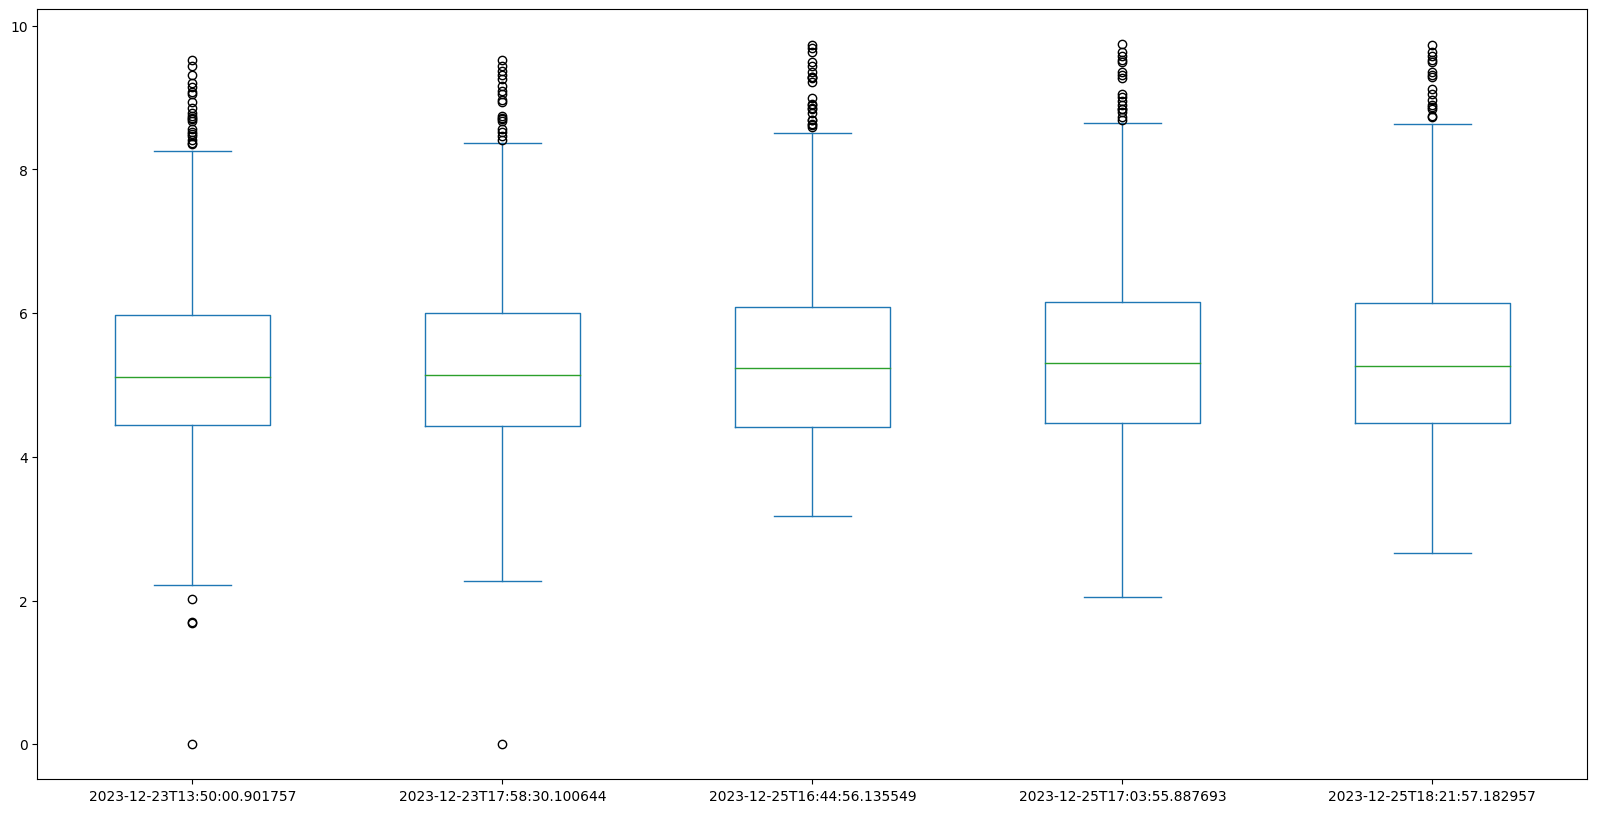

In [332]:
df.plot(kind="box", figsize=(20, 10))
plt.show()

In [333]:
df.sort_values(by=[cur_time], ascending=False)

,2023-12-23T13:50:00.901757,2023-12-23T17:58:30.100644,2023-12-25T16:44:56.135549,2023-12-25T17:03:55.887693,2023-12-25T18:21:57.182957
0369.txt,9.526210,9.526210,9.729033,9.742189,9.729033
0684.txt,8.707094,8.707094,9.634218,9.634218,9.634218
0517.txt,9.320353,9.320353,9.352180,9.576977,9.576977
0759.txt,9.443366,9.443366,9.688696,9.523461,9.523461
0935.txt,9.147566,9.368765,9.489246,9.489246,9.489246
...,...,...,...,...,...
0317.txt,3.653791,3.653791,3.295787,3.361161,3.273001
0182.txt,3.252125,3.666799,3.173478,3.244277,3.207365
0709.txt,3.559308,3.558589,3.180413,3.182700,3.180413
0151.txt,2.559907,4.927386,4.962194,2.600973,3.067071


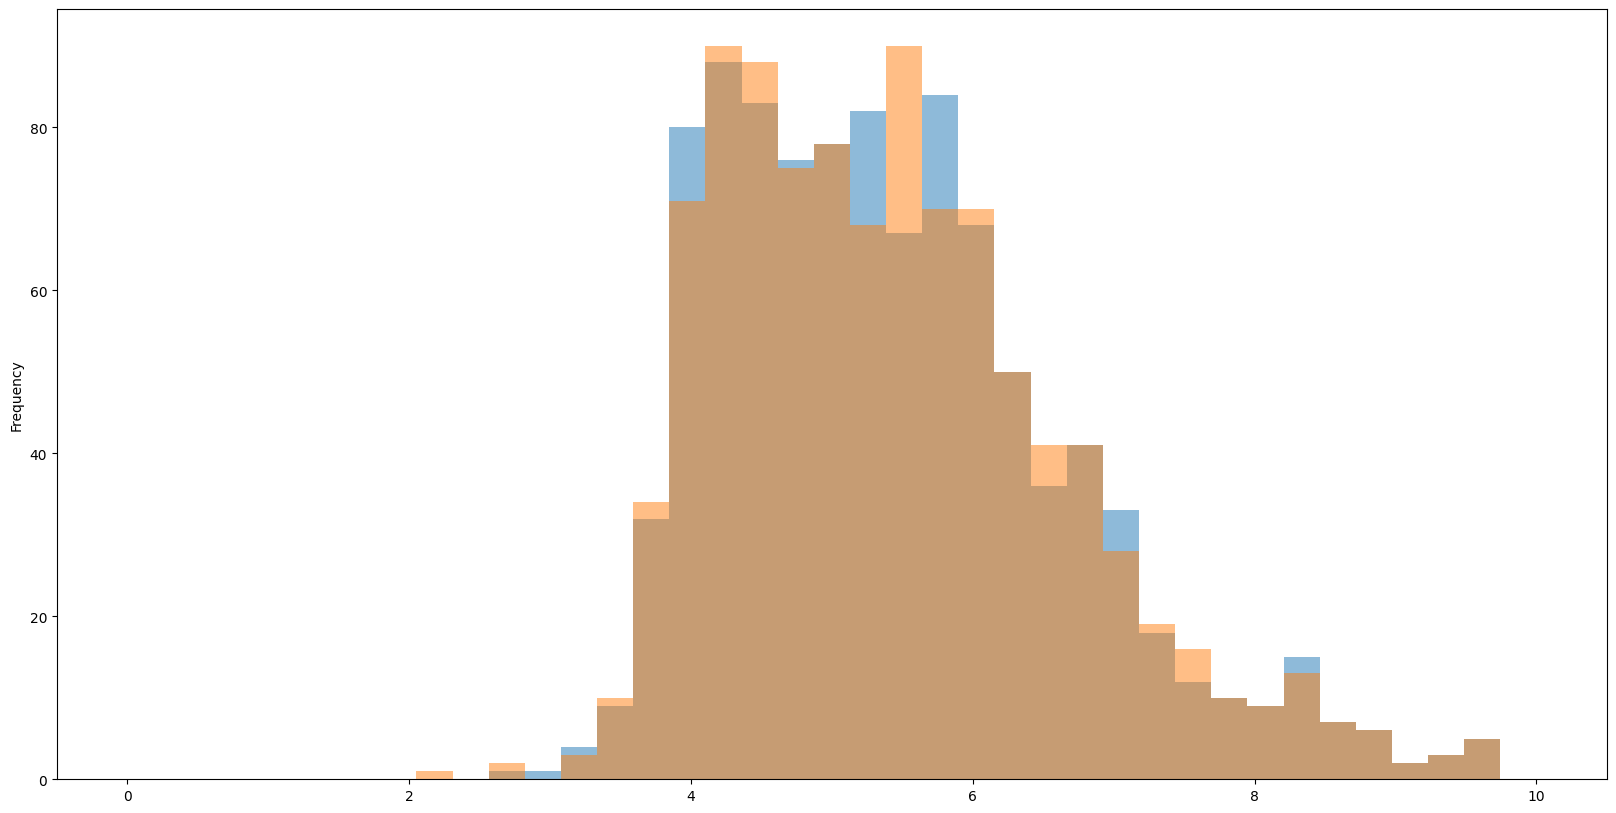

In [334]:
bins = np.linspace(0, 10, 40)
last_sel = df.iloc[:, -1]
last_sel.plot.hist(bins=bins, figsize=(20, 10), alpha=0.5)
last2_sel = df.iloc[:, -2]
last2_sel.plot.hist(bins=bins, figsize=(20, 10), alpha=0.5)
plt.show()

In [335]:
last_df = df.iloc[:, -1]
wins = df.sub(last_df, axis=0)<0
loses = df.sub(last_df, axis=0)>0
win_cnt = wins.sum(axis=0)
lose_cnt = loses.sum(axis=0)
(win_cnt - lose_cnt).sort_index(ascending=False)

2023-12-25T18:21:57.182957      0
2023-12-25T17:03:55.887693    121
2023-12-25T16:44:56.135549    255
2023-12-23T17:58:30.100644    133
2023-12-23T13:50:00.901757    163
dtype: int64